# **菊安酱与菜菜的Python机器学习可视化**

## 第七期 变化图

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

## <center>每周三晚上8点直播1小时，完整版2小时周日上线~</center>
## <center>单数周菜菜直播，双数周菊安酱直播，哔哩哔哩与peixun.net同步开启</center>

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

**注意：本篇中可能遇见无法在matpotlib和seaborn中显示中文或者负号的问题**  
如果你遇见了，请参考链接，可永久解决中文和负号问题：https://www.jianshu.com/p/914b5f4ce6bf  
或者你也可以在每次需要负号和中文的时候执行下面的代码来避免中文或负号显示不出来：

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei'] 
plt.rcParams['axes.unicode_minus']=False

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

## **第七章 变化图 Change**

变化图是描述数据变化的图像，基本是以折线图的形式进行展现，并且横坐标常常是时间<br>
折线图是最常见的可视化图像之一，它代码简单解读也非常简单，甚至我们可以使用Excel来绘制它  
但它其实可以有很多不同的变体：多个坐标轴，为曲线上色，叠加曲线的面积等等……<br>

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week7%20Change/07%20change.PNG" align="center" />

><img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week7%20Change/%E6%83%8A%E5%8F%B9.PNG" align="center" />   
>注意，在本章之中图像的顺序会和50图原博客中的顺序不太一致。我们将先讲解41，44号图像，因为他们使用了一致的数据集。  
>然后我们再讲解43，45和46号图，他们都是与普通折线图比起来，改变了一些性质来表现出更多信息的图像。  
>最后我们会讲解42号图像，这是一张基于统计学知识来补充折线图的图像。

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 41/50 带副座标轴的折线图

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week7%20Change/41%20%E5%B8%A6%E5%89%AF%E5%9D%90%E6%A0%87%E8%BD%B4%E7%9A%84%E6%8A%98%E7%BA%BF%E5%9B%BE.PNG" align="center" />

横坐标：年份  
纵坐标：（左）个人储蓄率，（右）失业人口

### 1. 导入需要的绘图库&基本设置

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### 2. 导入数据，准备数据

In [4]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")

In [7]:
df.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


In [6]:
df.shape

(574, 6)

In [8]:
name = ['日期','个人消费支出','总人口','个人储蓄率','失业时长中位数','失业人数']

#pce: personal consumption expenditures (in billions of dollars) 个人消费支出
#pop: total population (in thousands)总人口
#psavert: personal savings rate (in month)个人储蓄率：存款在个人的收入中所占的比例，本质就是存款的多少
#uempmed：median duration of unemployment (in weeks) 失业时长中位数
#unemploy:number of unemployed (in thousands) 失业人数

In [9]:
x = df['date'] #横坐标
y1 = df['psavert']
y2 = df['unemploy']

### 3. 代码解析

#### ax.twinx()

> 函数功能
>> 建立共享x轴，并带次坐标轴的另一个子图

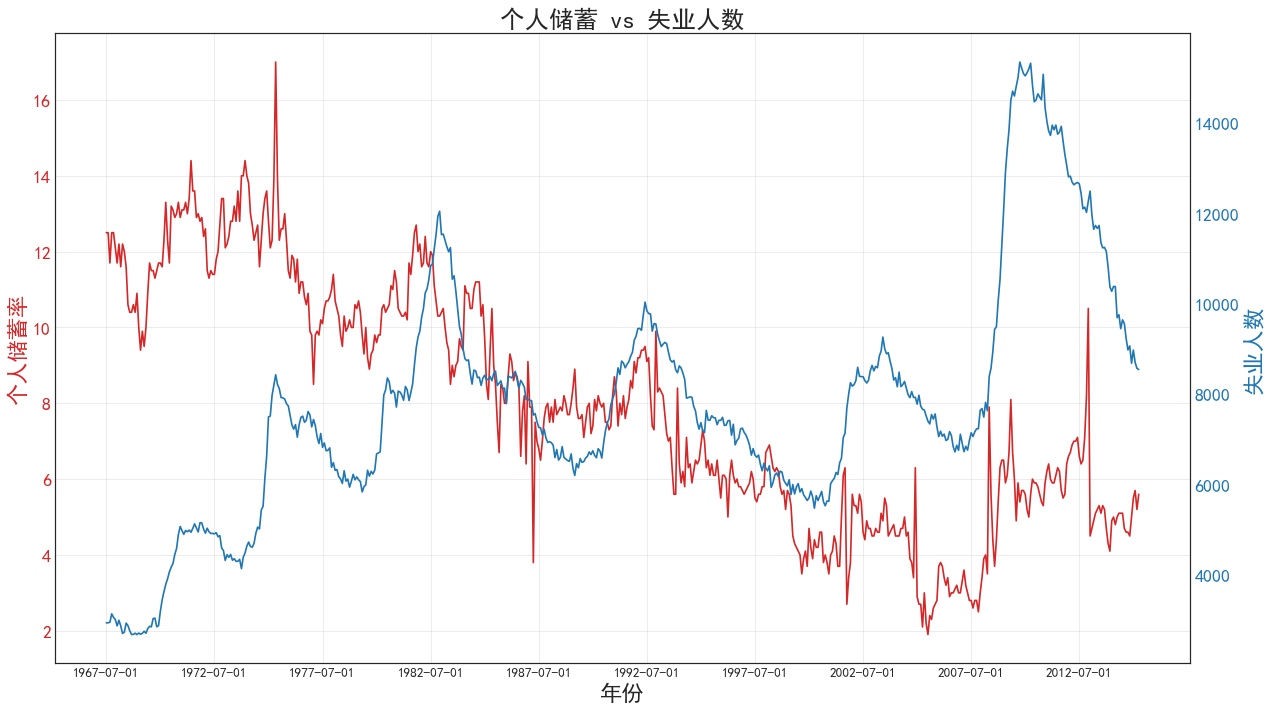

In [20]:
#绘制第一条线 (Y轴靠左)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80) #一行一列，只生成一个画布和一个子图
ax1.plot(x, y1, color='tab:red')

#绘制第二条线 (Y轴靠右)
ax2 = ax1.twinx()  #实例化共享相同x轴的第二个轴
ax2.plot(x, y2, color='tab:blue')

plt.rcParams['font.sans-serif']=['Simhei'] 
plt.rcParams['axes.unicode_minus']=False

#装饰图像
#第一个子图(Y轴靠左)
ax1.set_xlabel('年份', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12) #设置与标尺有关的一切参数
ax1.set_ylabel("个人储蓄率", color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0
                , labelcolor='tab:red' #调节坐标轴标尺的颜色
               )
ax1.grid(alpha=.4) #网格的透明度

#第二个子图(Y轴靠右)
ax2.set_ylabel("失业人数", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("个人储蓄 vs 失业人数",fontsize=22)
fig.tight_layout()
plt.show()

### 4. 图像解读

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 44/50 不堆积的面积图

面积图是通过在折线下填充颜色，形成以折线图的趋势为界的色块的图像。  
面积图传达的信息本质和条形图一样，不过面积图看起来更加美观。

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week7%20Change/%E4%B8%8D%E5%8F%A0%E5%8A%A0%E7%9A%84%E9%9D%A2%E7%A7%AF%E5%9B%BE.PNG" align="center" />

横坐标：年份  
纵坐标：（红）个人储蓄率，（蓝）失业时长的中位数

### 1. 导入需要的绘图库&基本设置

In [41]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### 2. 导入数据，准备数据

In [42]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")

In [43]:
x = df['date'].values.tolist()
y1 = df['psavert'].values.tolist()
y2 = df['uempmed'].values.tolist()

In [47]:
max(y1),min(y1)

(17.0, 1.9)

In [48]:
max(y2),min(y2)

(25.2, 4.0)

In [49]:
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
columns = ['个人储蓄率', '失业时长中位数']

### 3. 复习填补曲线下区域的函数，代码解读

#### **plt.fill_between**  

> 函数功能：   
>> 将两条曲线之间区域填充为同一颜色 

> 重要参数：  
>> x: 定义曲线的x坐标   
>> y1: 定义第一条曲线的y坐标  
>> y2: 定义第二条曲线的y坐标    

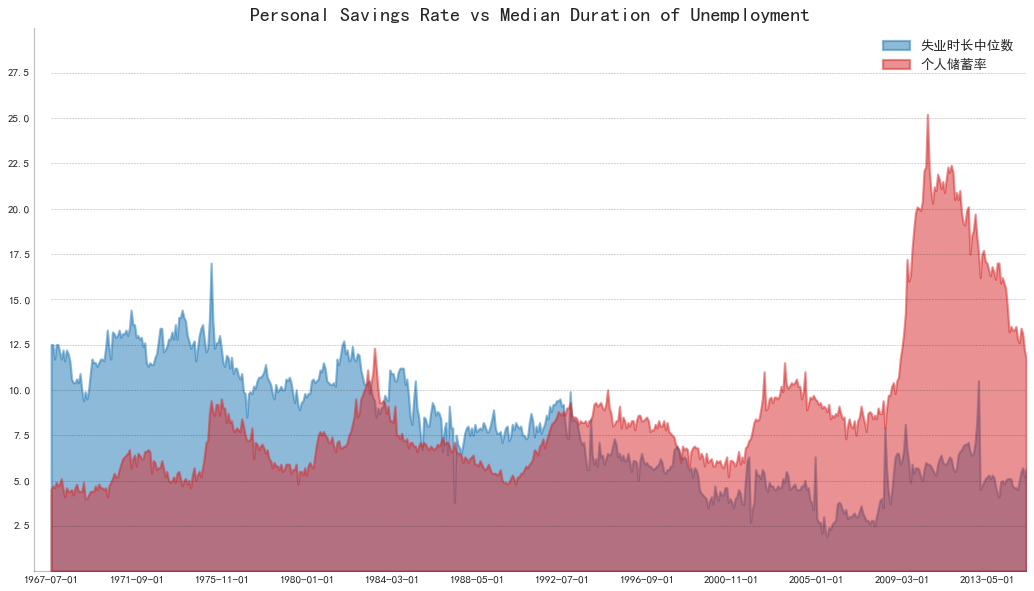

In [53]:
#绘制图像
fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2);

#装饰图像
plt.rcParams['font.sans-serif']=['Simhei'] 
ax.set_title('Personal Savings Rate vs Median Duration of Unemployment', fontsize=18)
ax.set(ylim=[0, 30])
ax.legend(loc='best', fontsize=12)
plt.xticks(x[::50], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(2.5, 30.0, 2.5), fontsize=10)
plt.xlim(-10, x[-1])

#绘制背景上的横线
for y in np.arange(2.5, 30.0, 2.5): #一次只能够绘制一条线，所以我们循环绘制   
    plt.hlines(y, xmin=0, xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)

#调整坐标轴的显示程度
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()